In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [3]:
# Para instalar seaborn si no está instalado
pip install seaborn

# Para actualizar seaborn si tienen una versión anterior a 0.12.2
#pip install seaborn --upgrade

SyntaxError: invalid syntax (<ipython-input-3-ae4bca708794>, line 2)

In [4]:
# Verificar que tengamos la version 0.12.2 o superior
sns.__version__

'0.13.1'

# Visualización

## Seaborn objects y la gramática de gráficos

Introducidos a finales de 2022, el nuevo sistema está basado el paradigma "Gramática de Gráficos" que utilizan otros paquetes como `ggplot2` de R.

No necesitamos recordar una docena de métodos para hacer gráficos, todo gráfico se hace mediante una única clase `Plot()`.n

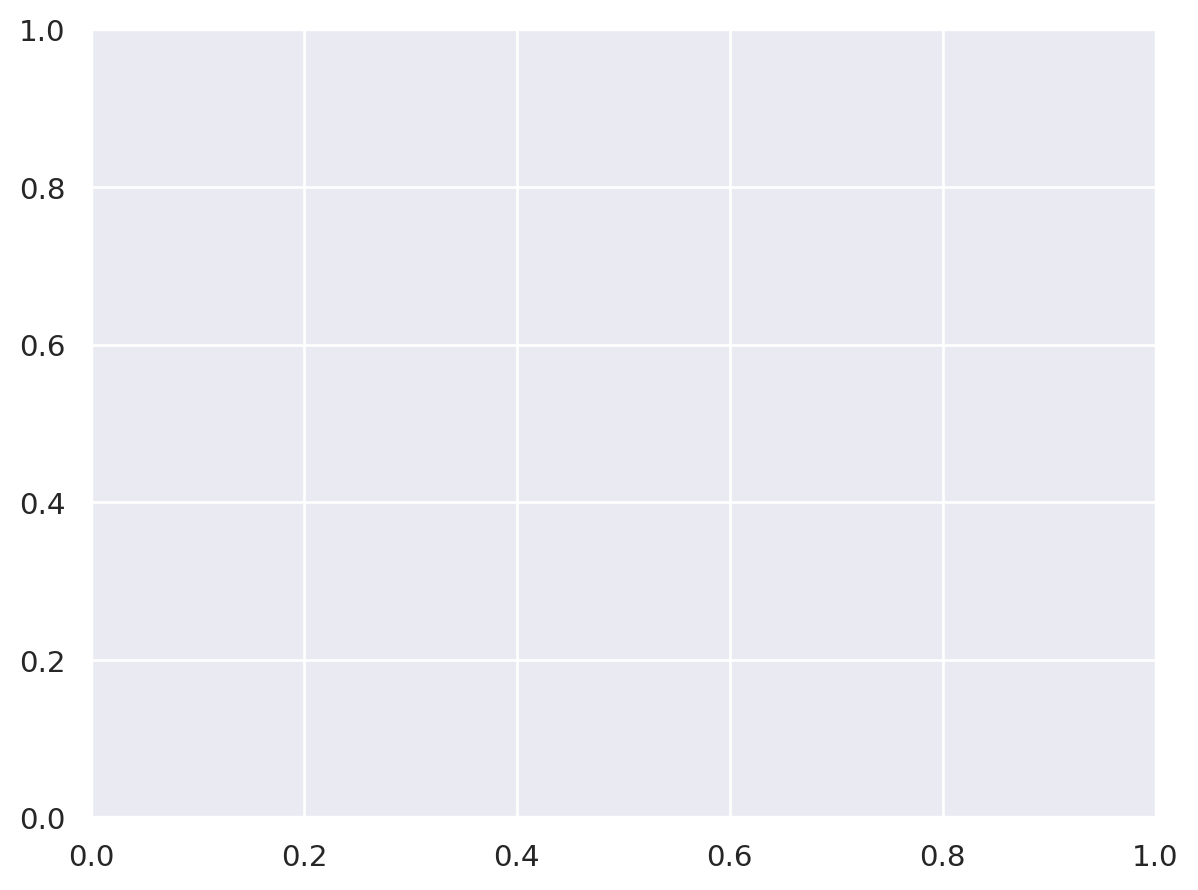

In [5]:
# Comenzamos con un gráfico vacío
so.Plot()

In [6]:
# Agregamos un conjunto de datos, por ejemplo un dataset con el índice Dow Jones de las bolsas de Estados Unidos.
dowjones = sns.load_dataset("dowjones")
dowjones.head()


Date  Price
0 1914-12-01  55.00
1 1915-01-01  56.55
2 1915-02-01  56.00
3 1915-03-01  58.30
4 1915-04-01  66.45

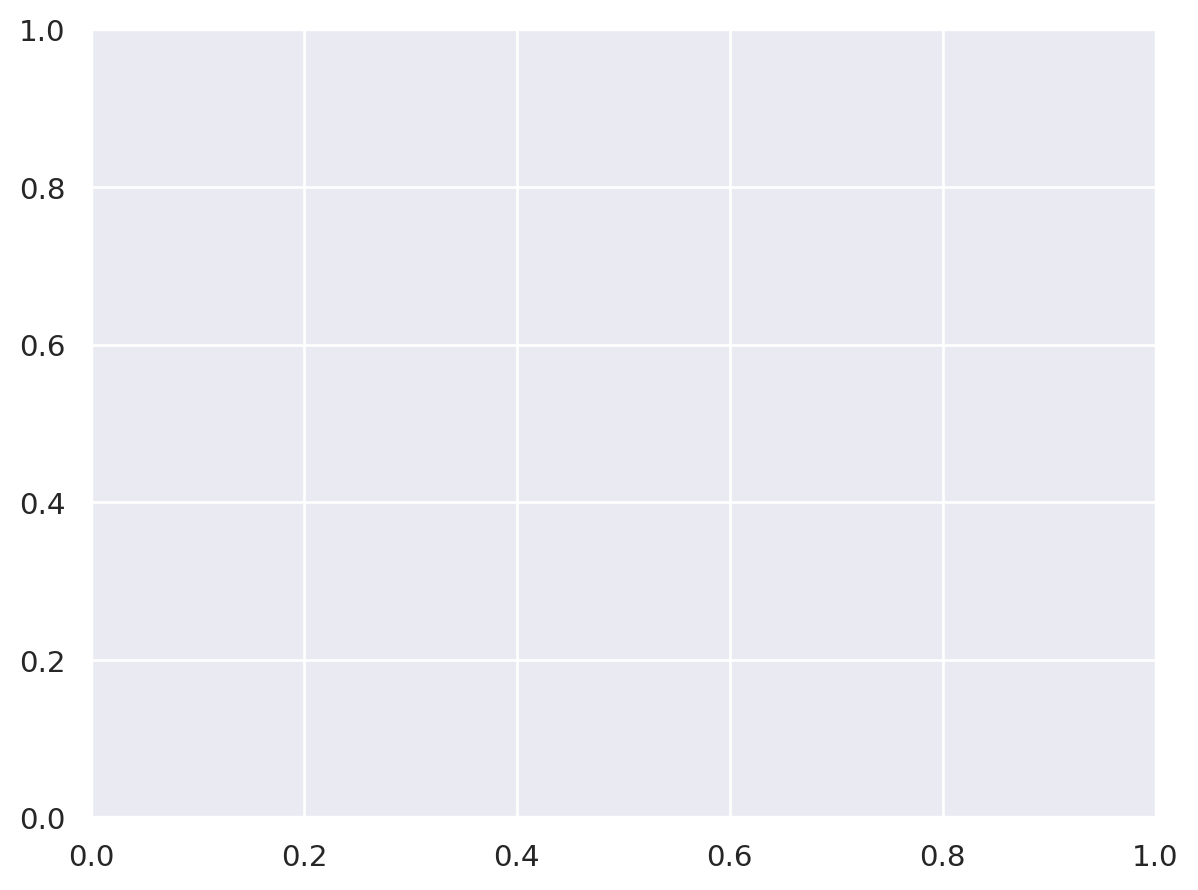

In [7]:
so.Plot(data = dowjones)

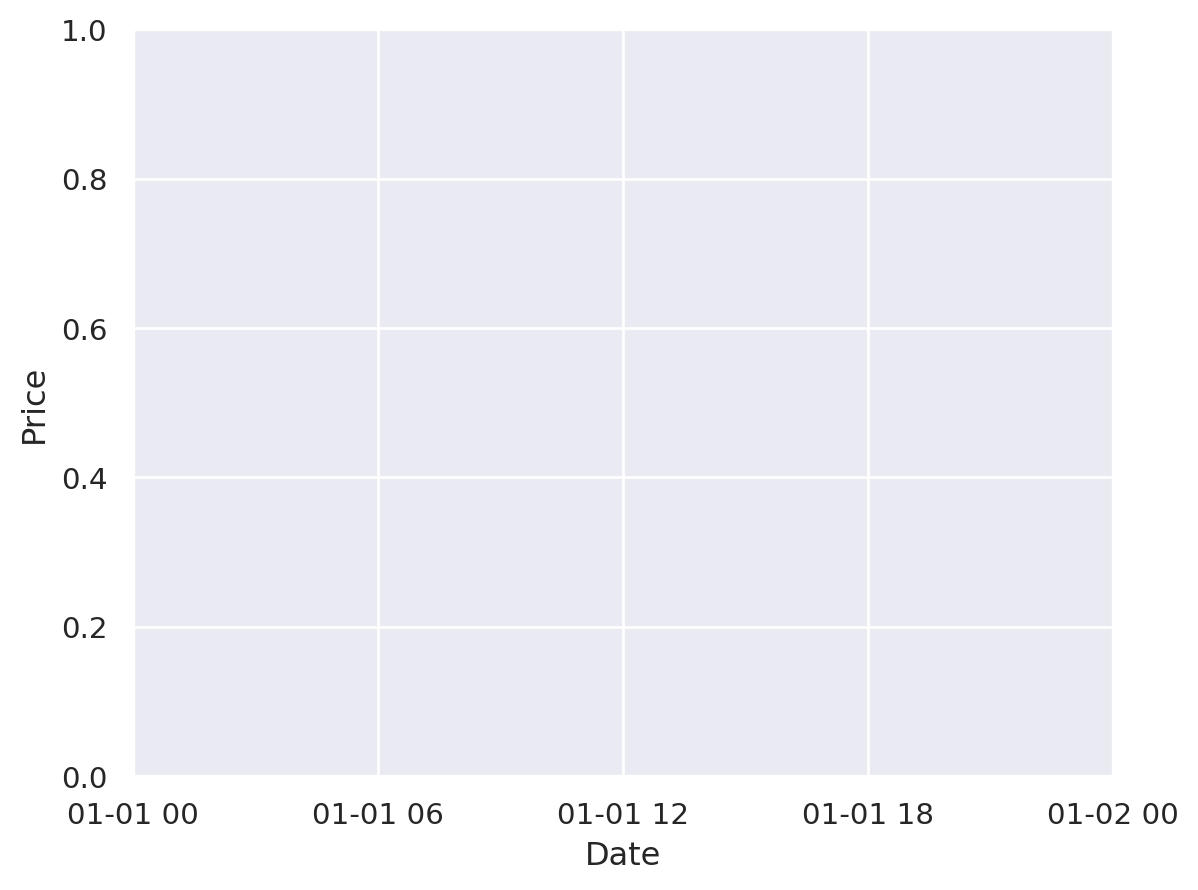

In [8]:
# Mapeamos la fecha al eje X y el precio al eje Y
so.Plot(data = dowjones, x = "Date", y = "Price")

### Gráfico de funciones

In [ ]:
# Finalmente agregamos una marca, en este caso una curva.
# Usamos paréntesis para poder separar el comando en varias líneas y facilitar la lectura.
(
    so.Plot(data = dowjones, x = "Date", y = "Price")
    .add(so.Line())
)

### Gráfico de dispersión (scatter plot)

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

In [ ]:
# Para usar puntos en vez de curvas, cambiamos la marca a Dot().
(
    so.Plot(data = tips, x = "total_bill", y = "tip")
    .add(so.Dot())
)


### Gráfico de curvas y puntos?

In [44]:
flights = sns.load_dataset("flights")
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

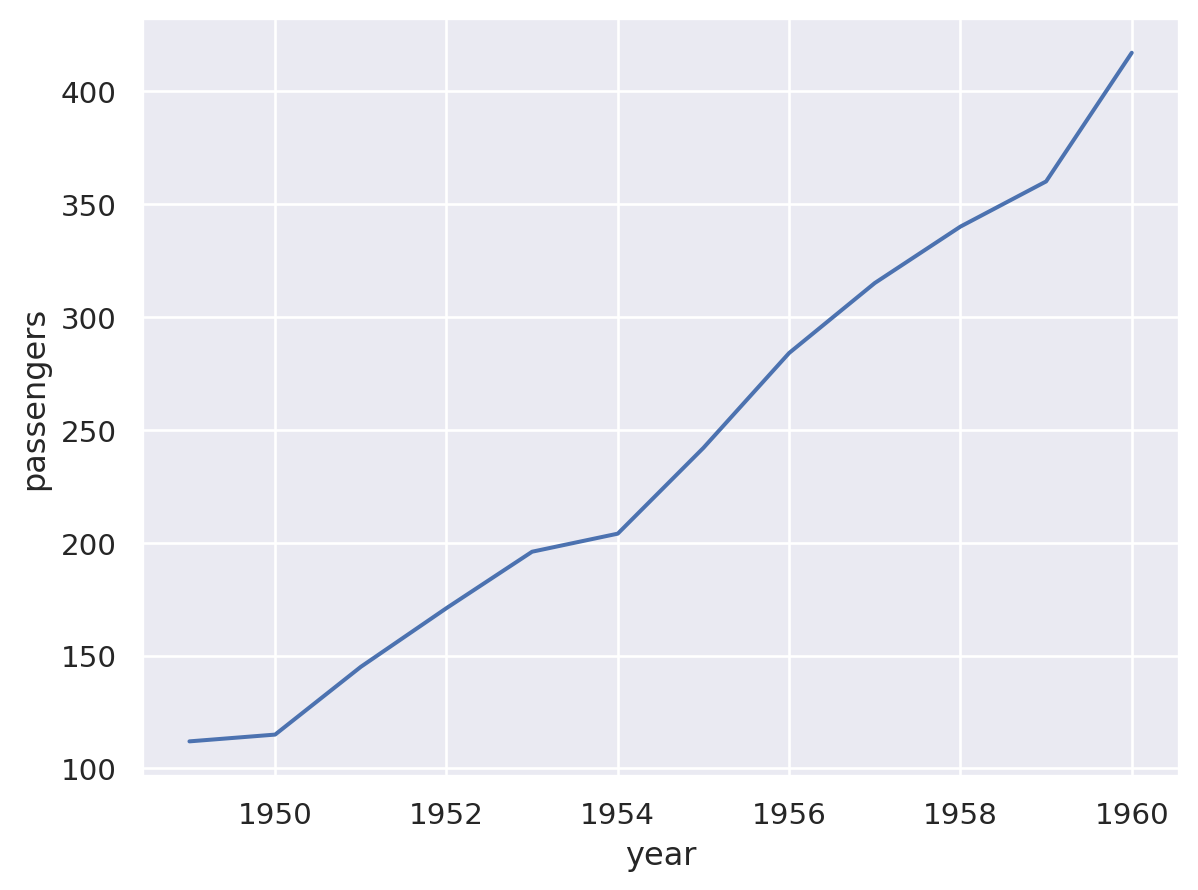

In [10]:
# Graficamos la curva cantidad de pasajeros en enero de cada año
vuelosEnero = flights[flights.month == "Jan"]
(
    so.Plot(data = vuelosEnero, x = "year", y = "passengers")
    .add(so.Line())
)

In [11]:
# Si queremos agregar los puntos correspondientes a cada dato...
(
    so.Plot(data = flights[flights.month == "Jan"], x = "year", y = "passengers")
    .add(so.Line())
    .add(so.Dot())
)

Podemos también fácilmente agregar datos (aggregate = agregar, juntar, resumir, ...)

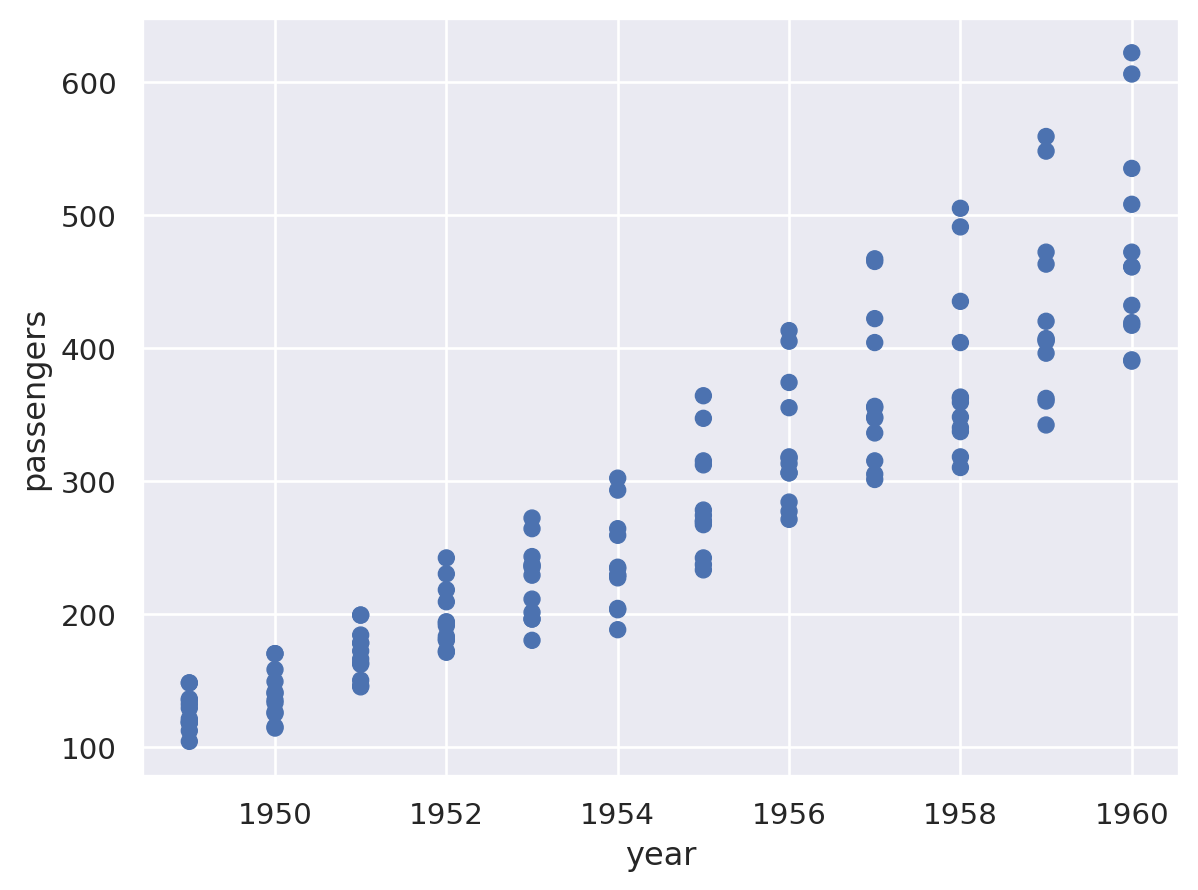

In [12]:
# Queremos considerar todos los meses.
# Si sacamos el filtro...

(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Dot())
)

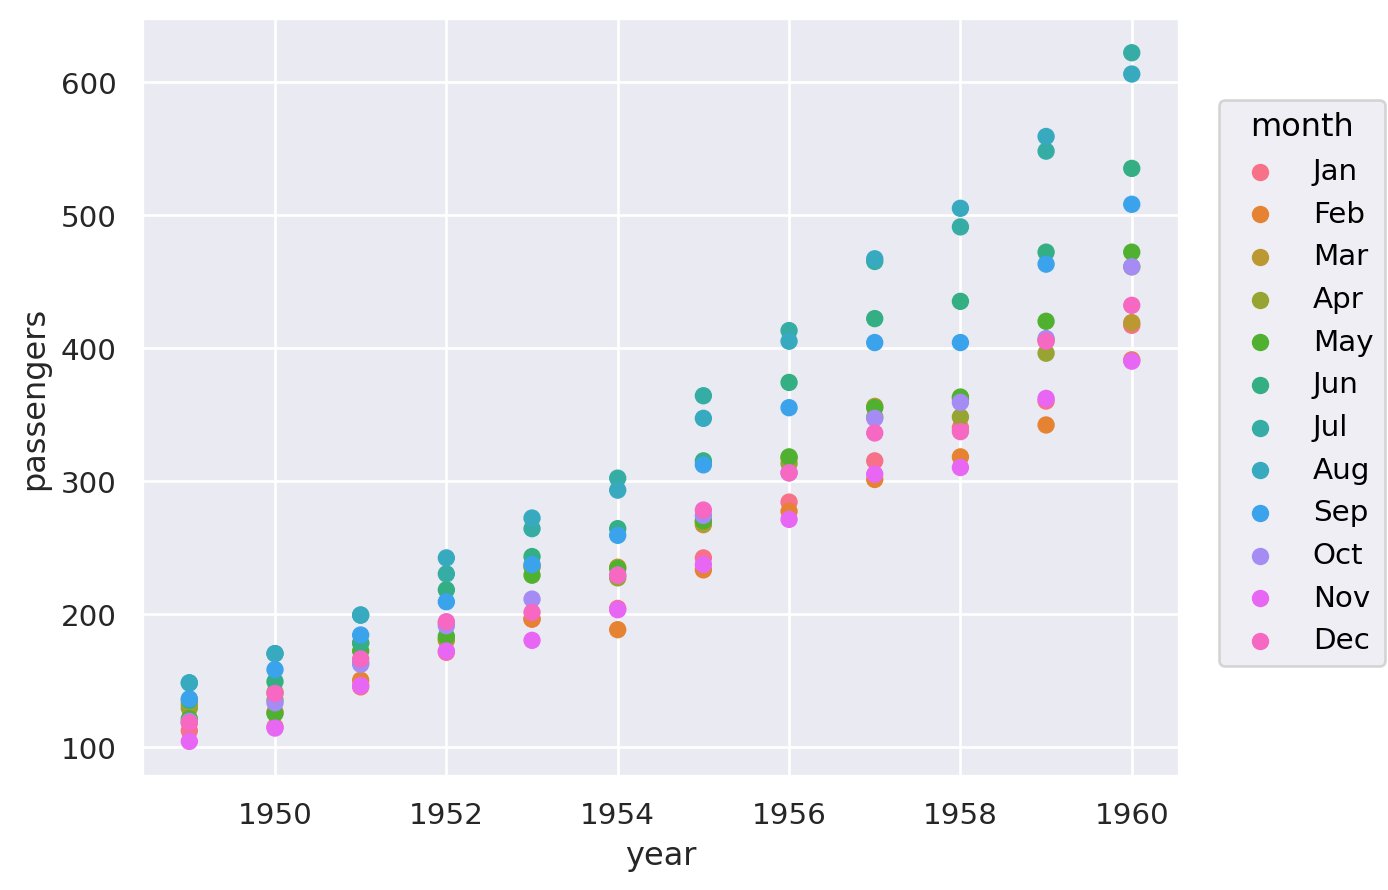

In [13]:
# Opción 1: utilizamos otro canal para codificar el mes
(
    so.Plot(data = flights, x = "year", y = "passengers", color = "month")
    .add(so.Dot())
)

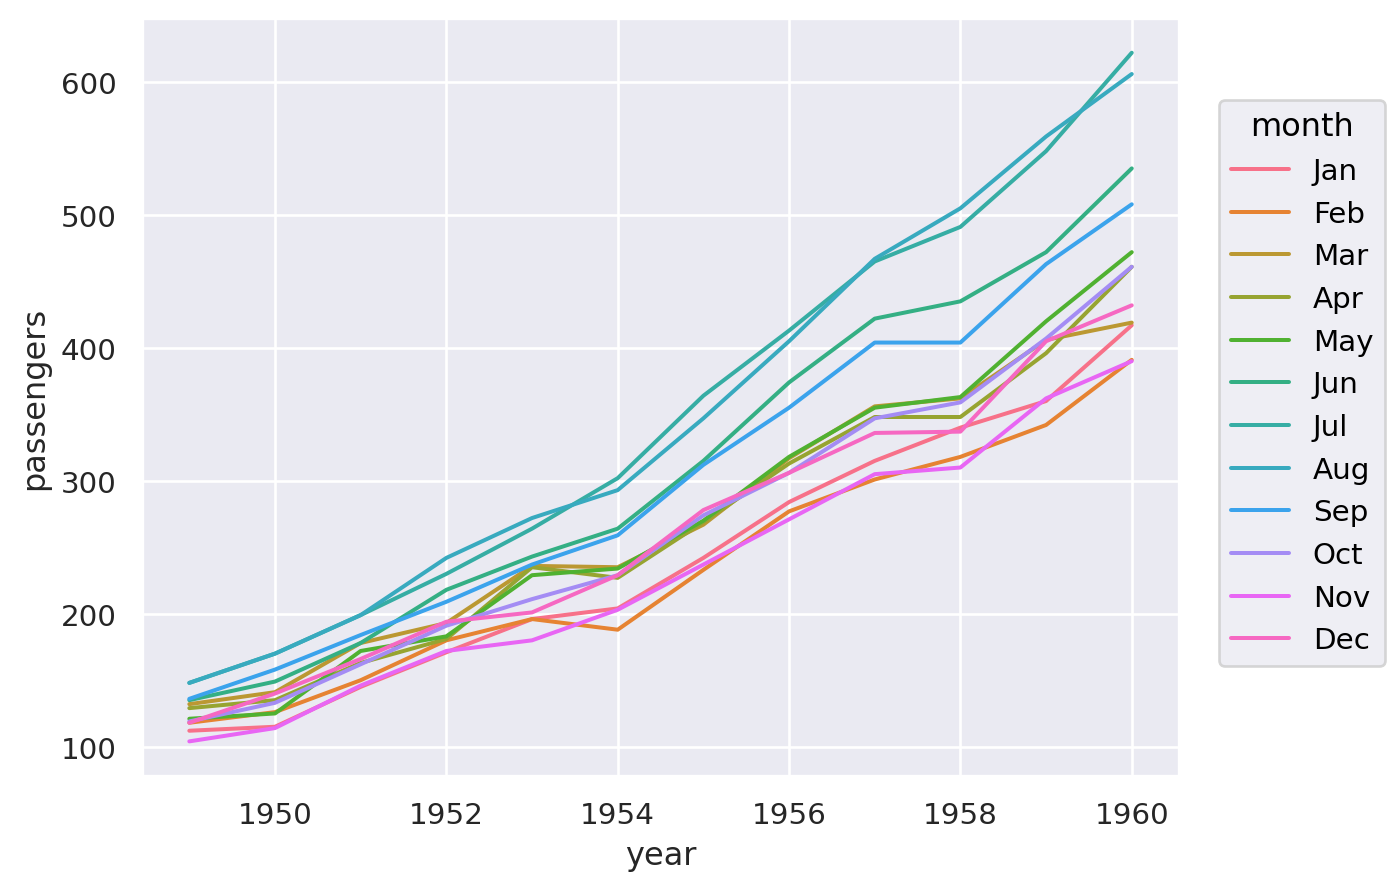

In [14]:
# Y si usamos líneas?
(
    so.Plot(data = flights, x = "year", y = "passengers", color = "month")
    .add(so.Line())
)

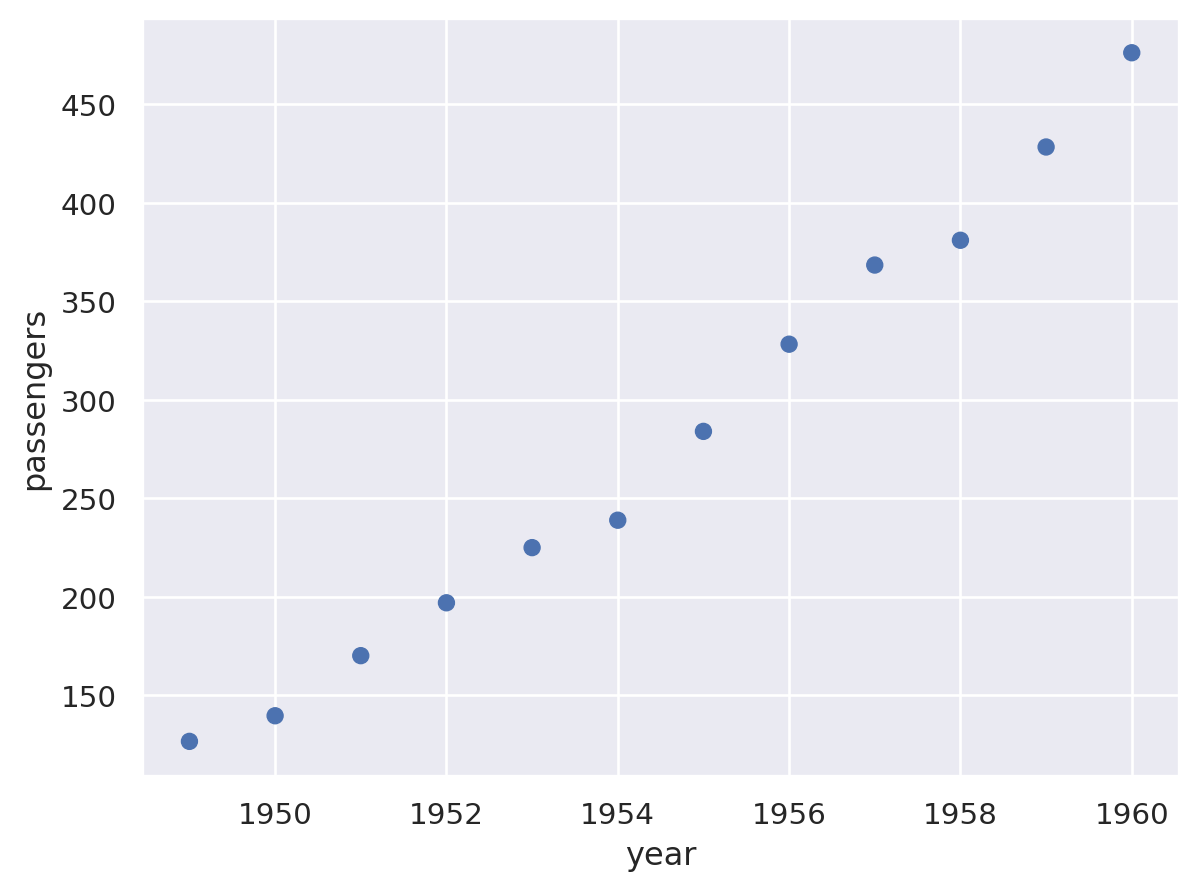

In [15]:
# Opción 2: agregamos los datos por mes
# Podemos calcularlos previamente utilizando lo que vimos en la práctica 2 (groupby(), sum(), ...)
# o usamos una función para agregar los datos.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Dot(), so.Agg("mean"))
)

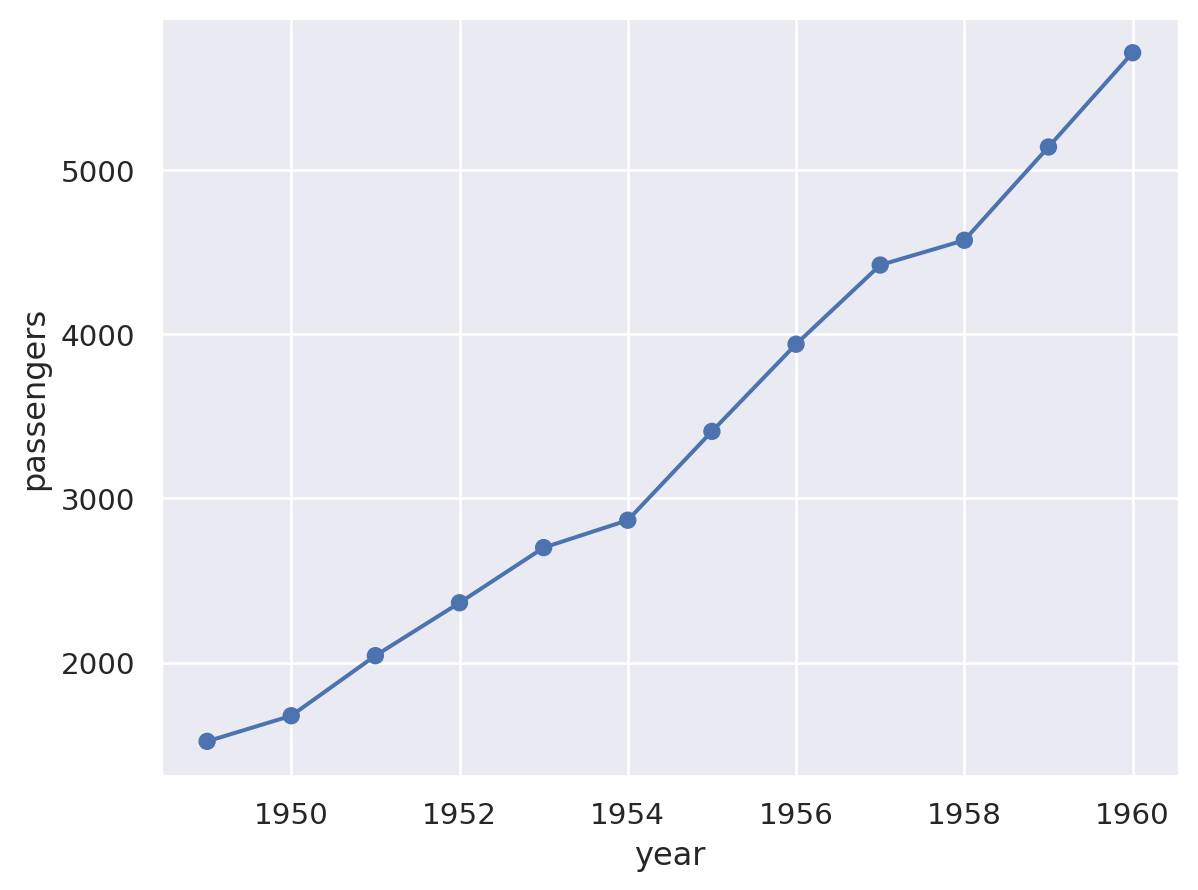

In [16]:
# Qué valores está graficando? Es la suma??
# Podemos indicar cualquier función de Pandas.Series para agregar los datos
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Dot(), so.Agg("sum"))
    .add(so.Line(), so.Agg("sum"))
)

## Mapeo y asignación por capas

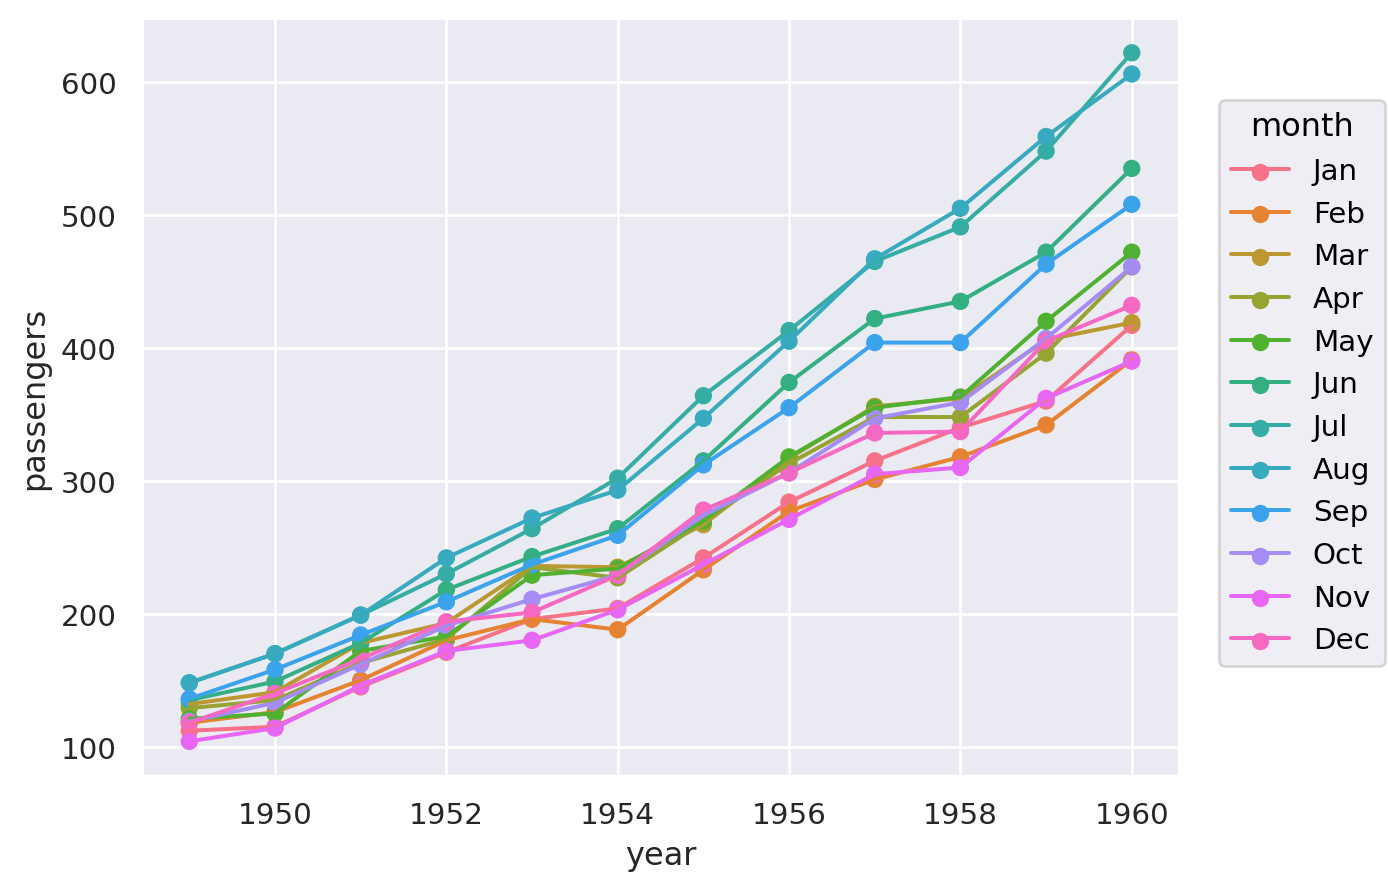

In [17]:
# Podemos asignar una codificación al definir el Plot() y esa codificación para a todas las capas.
(
    so.Plot(data = flights, x = "year", y = "passengers", color = "month")
    .add(so.Line())
    .add(so.Dot())
)

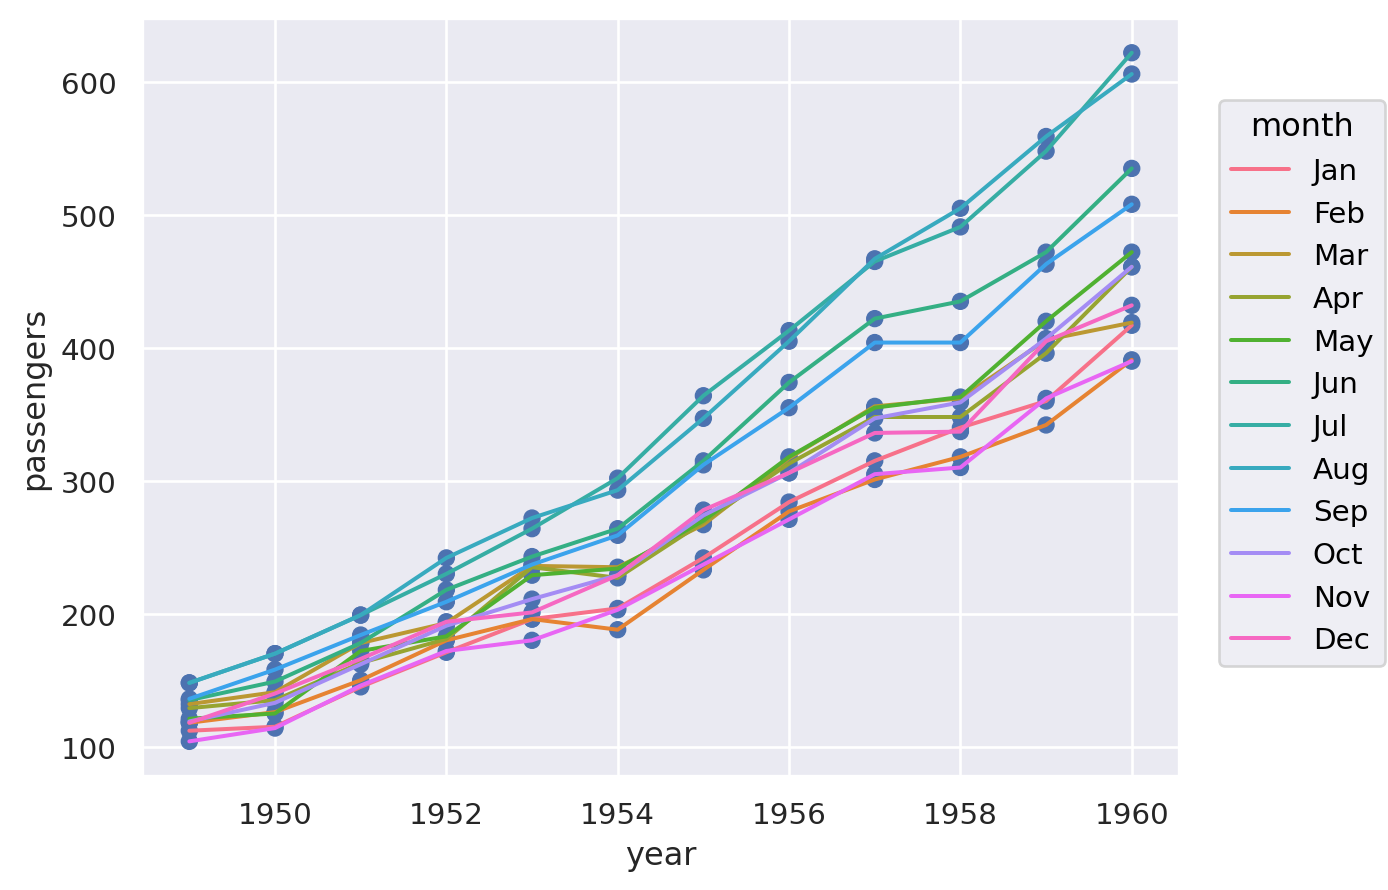

In [18]:
# O podemos asignar una codificación al agregar una marca y esa codificación se aplica solo en esa capa.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Line(), color = "month")
    .add(so.Dot())
)

In [22]:
# Si asignamos un pámatetro a la marca Dot() u otra marca,
# no estamos codificando datos sino que asignamos el valor directamente.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Line(), color = "month")
    .add(so.Dot(color = "red")),
)

(<seaborn._core.plot.Plot at 0x7fca1b6b5a50>,)

In [21]:
# Si asignamos un pámatetro a la marca Dot() u otra marca,
# no estamos codificando datos sino que asignamos el valor directamente.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Line(), color = "month")
    .add(so.Dot(color = "red"))
)


**Ejercicio** ¿Que pasa si hacemos `.add(so.Dot(color = "month"))`?

¿Y si hacemos `so.Plot(data = flights, x = "year", y = "passengers", color = "red")`?

In [25]:
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Line(), color = "month")
    .add(so.Dot(color = "month"))
)


ValueError: Invalid RGBA argument: 'month'

In [26]:
so.Plot(data = flights, x = "year", y = "passengers", color = "red")

ValueError: Could not interpret value `red` for `color`. An entry with this name does not appear in `data`.

**Conclusión:** Ojo con color, a veces determina pintar una variable y a veces pintar de un color. Dentro de .dot(color="red") o .line(color="red") pinta las lineas y puntos de rojo, hacer .dot(),color="month" codifica mandar al mes por el canal color

## Gráficos de barras

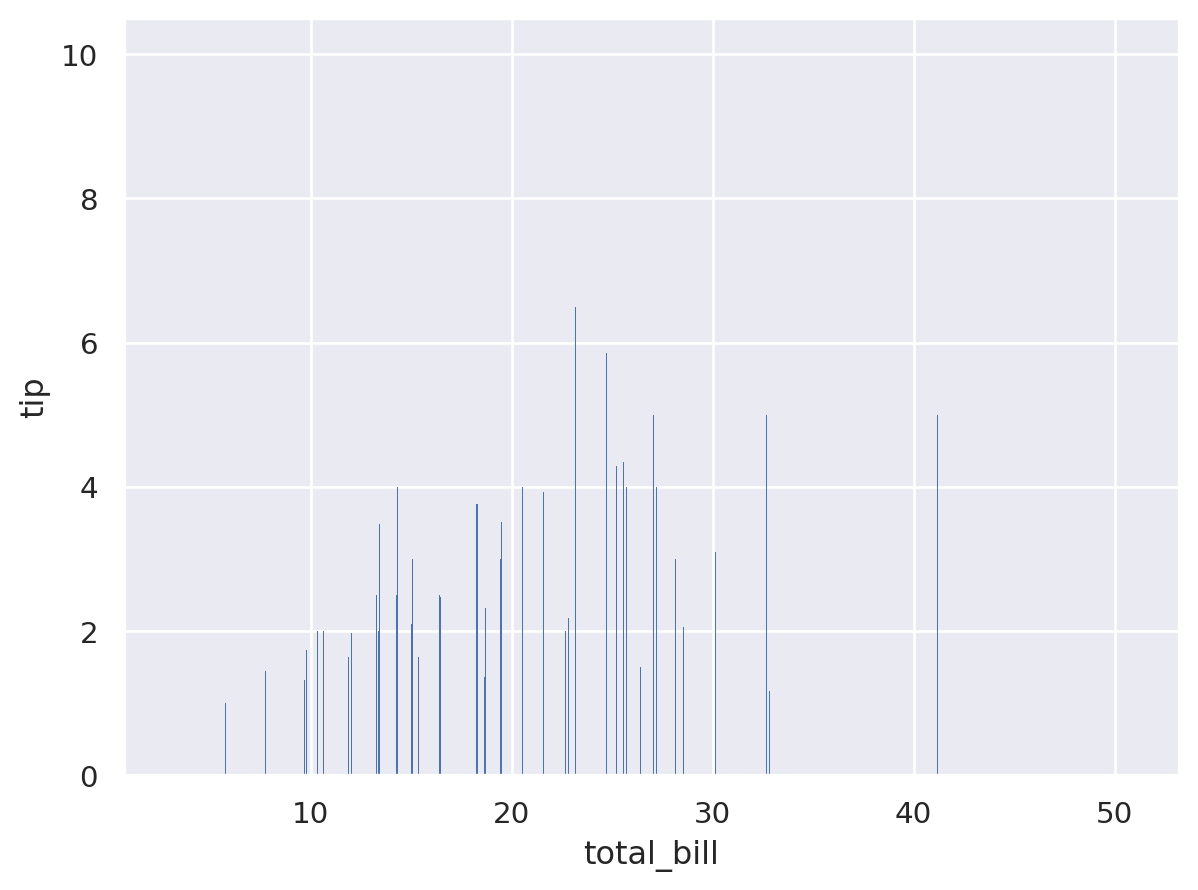

In [23]:
# Qué hace la marca "barras" (Bars)?
tips = sns.load_dataset("tips")
(
    so.Plot(tips, "total_bill", "tip")
    .add(so.Bar())
)

In [ ]:
# En el anterior caso no es una buena visualización.
# Probamos un ejemplo más sencillo

In [24]:
personas = pd.DataFrame({'nombre':['Marcos', 'Sofia', 'Andrés'], 'altura':[192, 168,165]})
(
    so.Plot(personas, "nombre", "altura")
    .add(so.Bar())
)

In [27]:
# La variable x puede también corresponder a valores numéricos discretos.
# Graficamos la cantidad total de vuelos por año.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Bar(), so.Agg("sum"))
)

## Histogramas
El último gráfico de barras podemos pensarlo como un histograma, vemos la cantidad de pasajero en función del año.
En ese caso las cantidades por mes ya estaban calculadas y solo las sumamos.

Cuando tenemos todos los datos individuales, podemos agregarlos para hacer un gráfico de barras usando el método `hist`.

In [28]:
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

#### Histograma de una variable categórica

Tenemos una base de datos con información de píngüinos y queremos saber cuántos pingüinos hay en cada isla.

In [29]:
# Podemos contarlos primero usando funciones de Pandas...
#pinguinos_por_isla = ???  ## EJERCICIO
#display(pinguinos_por_isla)

# Lo hacemos a mano para no resolver el ejercicio.
islas = ['Biscoe', 'Dream', 'Torgersen']
poblacion = [168, 124, 52]
pinguinos_por_isla = pd.Series(poblacion, index=islas)
display(pinguinos_por_isla)

Biscoe       168
Dream        124
Torgersen     52
dtype: int64

In [30]:
# Esto no funciona, no podemos usar una series de Pandas como data
pinguinos_por_isla.name = "poblacion"
pinguinos_por_isla.index.name = "isla"
display(pinguinos_por_isla)
(
    so.Plot(data = pinguinos_por_isla, x = "isla", y = "poblacion")
    .add(so.Bar())
)

isla
Biscoe       168
Dream        124
Torgersen     52
Name: poblacion, dtype: int64

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

**Pregunta:** ¿Podemos usar so.Plot() sin un DataFrame?

Sí, no necesariamente tenemos que indicar data, x e y al definir el Plot().

Podemos usar series de Pandas o arrays para x e y.

In [42]:
display(pinguinos_por_isla)

isla
Biscoe       168
Dream        124
Torgersen     52
Name: poblacion, dtype: int64

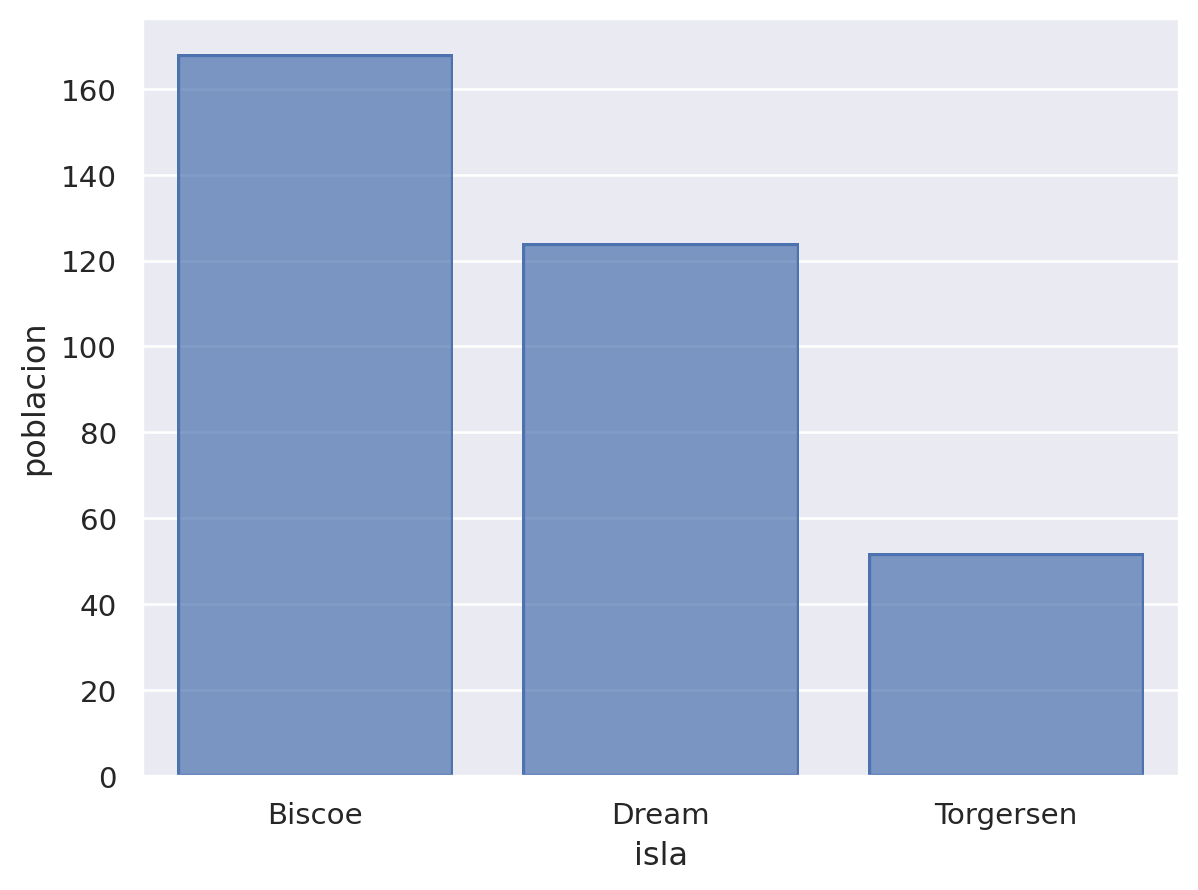

In [31]:
# Pero podemos indicar series para x e y, y no especificar ninguna DataFrame
(
    so.Plot(x = pinguinos_por_isla.index, y = pinguinos_por_isla)
    .add(so.Bar())
)

**Comentario:** también podemos utilizar variables distintas para distintas marcas.

In [36]:
pip install gapminder

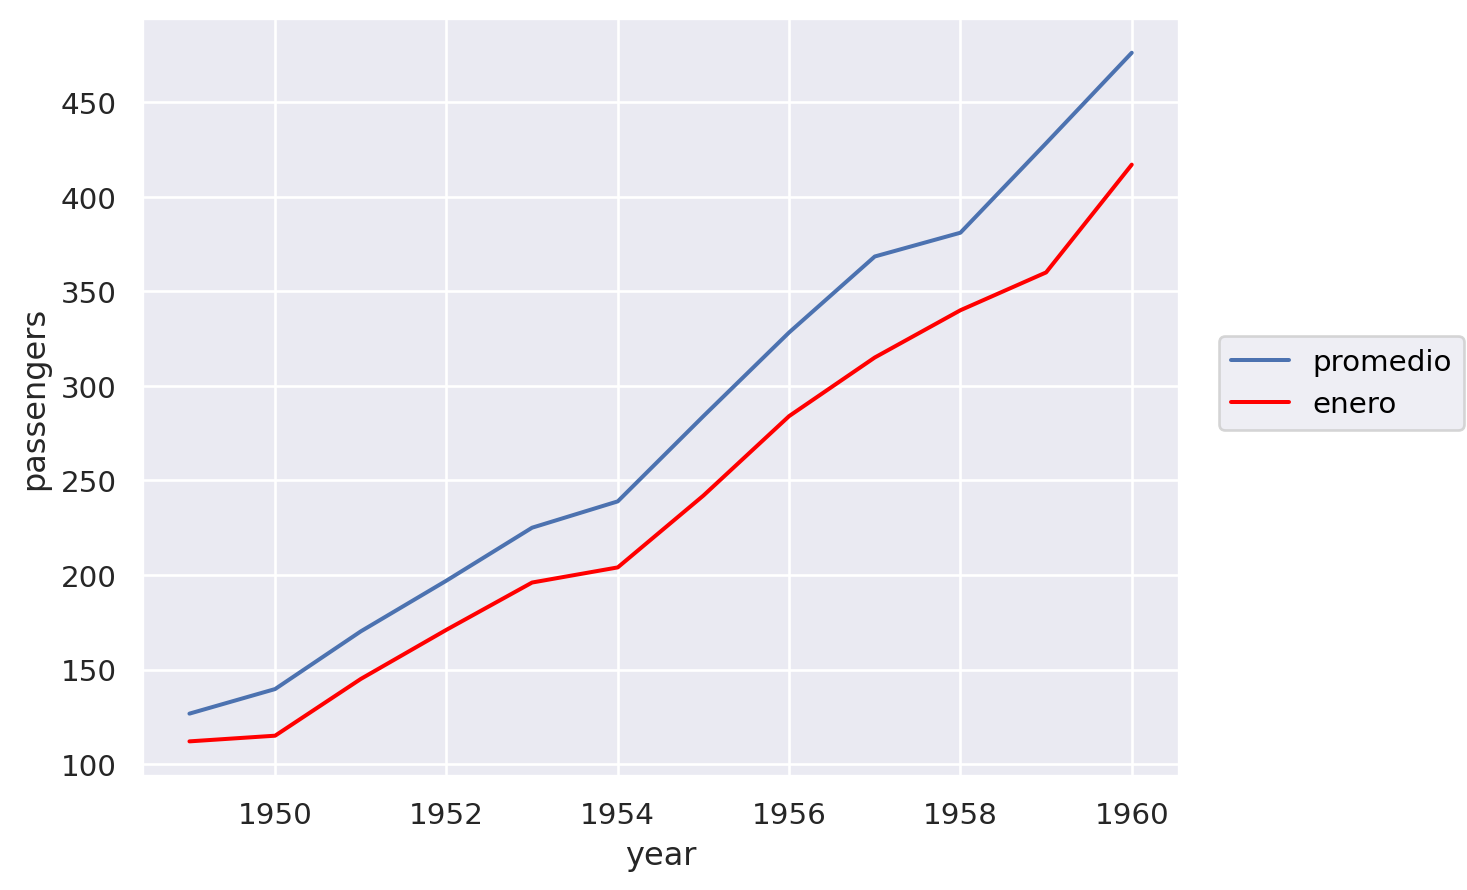

In [51]:
# Ejemplo (fuera del tema de histogramas!)

# Si queremos cantidad promedio de vuelos con vuelos en enero...
from gapminder import gapminder
pasajerosEnero = flights[flights["month"] == "Jan"]["passengers"]
(
    so.Plot(data = flights, x = "year")
    .add(so.Line(),so.Agg("mean"),y="passengers",label="promedio") # Promedio anual de pasajeros por mes
    .add(so.Line(color = "red"),y=pasajerosEnero,label="enero") # Pasajeros en enero
)

Ahora usamos las funciones de so.Plot() para agregar los datos y realizar el histograma.

No necesitamos nosotros contar "a mano" cuántos pingüinos hay en cada isla.

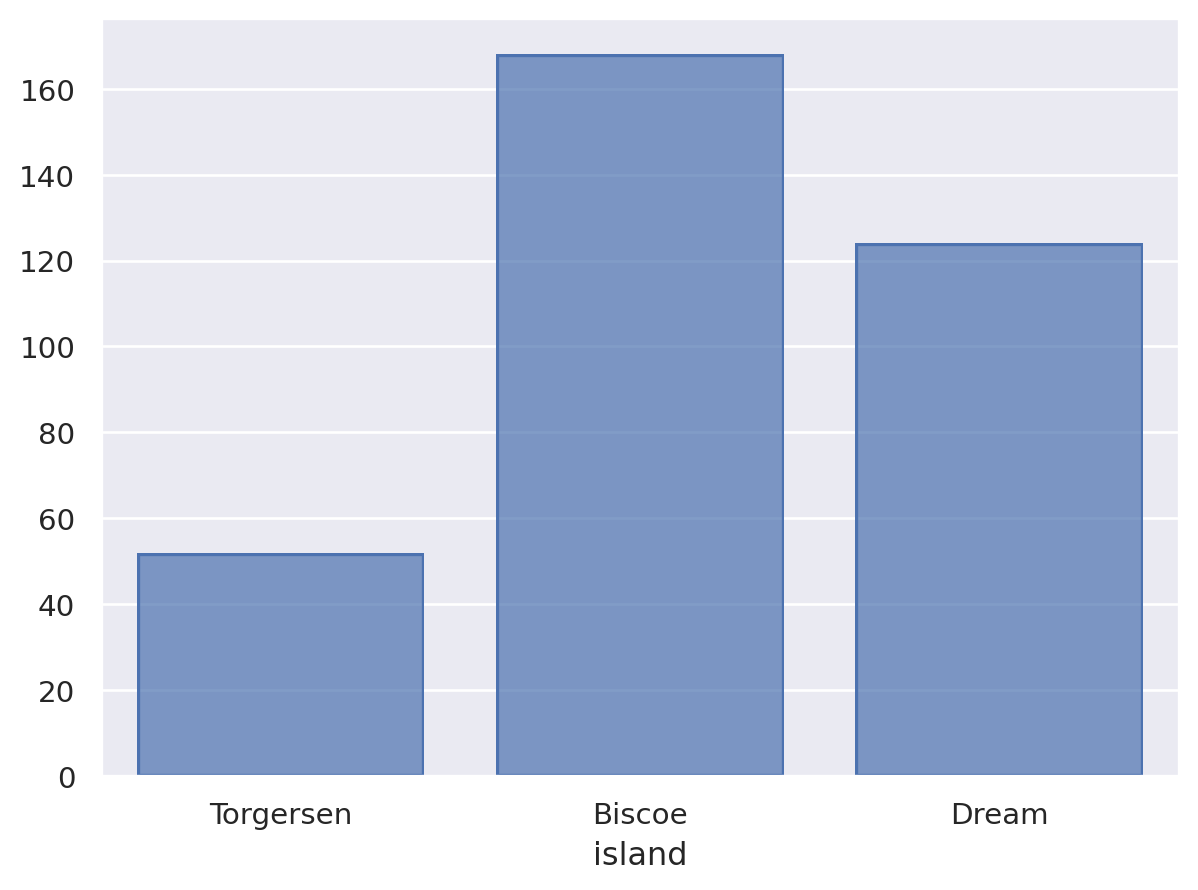

In [52]:
# Hay que asignar una variable y?
(
    so.Plot(data = penguins, x = "island")
    .add(so.Bar(), so.Hist())
)

#### Histograma de una variable numérica

### Ejercicio
Realizar en el cuaderno un histograma de cuatro barras para los siguientes datos:
$$
edades = \{20,28,18,10,50,55,70,75,80,76,82\}
$$

Verificar el gráfico en Python.


In [53]:
edades = pd.Series([20,28,18,10,50,55,70,75,80,76,82])
(
    so.Plot(x = edades)
    .add(so.Bar(), so.Hist(bins = 4))
)

### Pingüinos

Los histogramas nos sirven para analizar la distribución de valores observados de una variable.

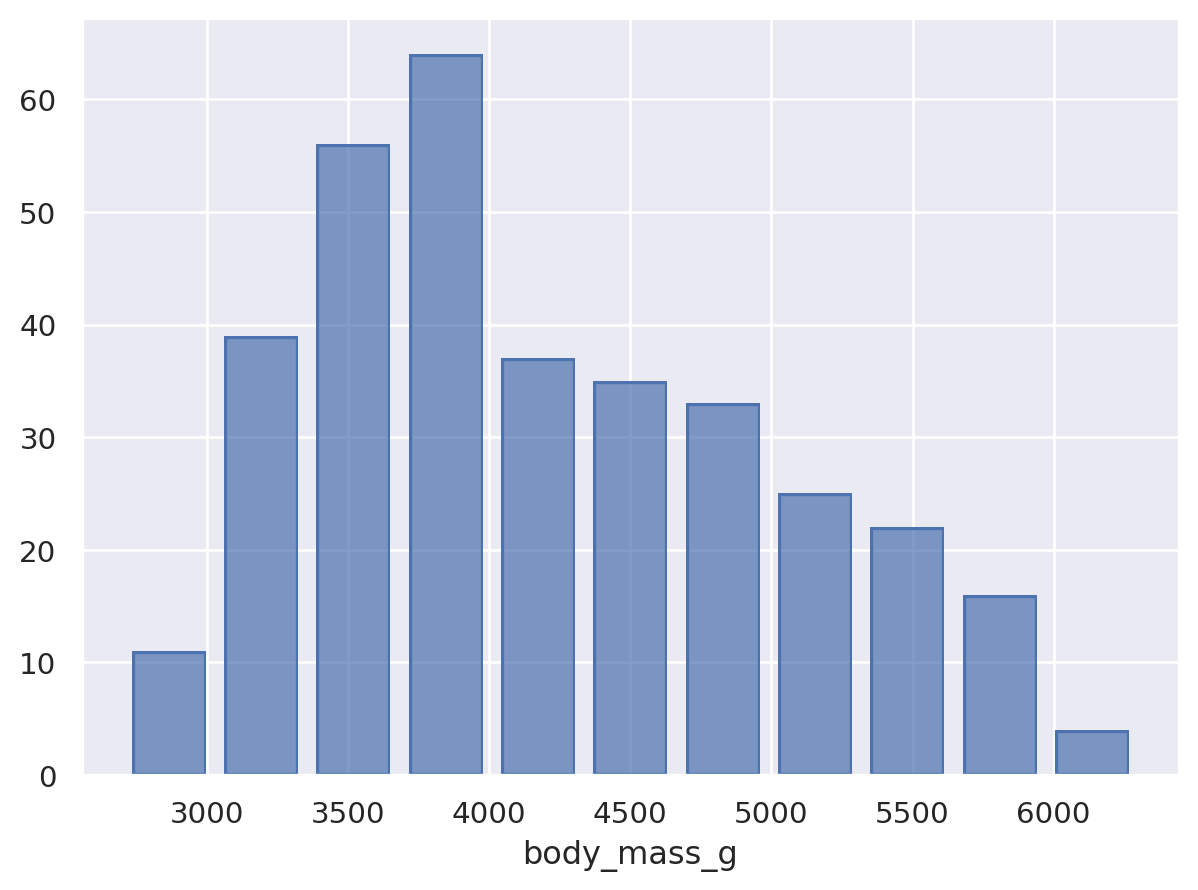

In [54]:
# Queremos ver cuántos pingüinos hay en distintos rangos de peso.
(
    so.Plot(data = penguins, x = "body_mass_g")
    .add(so.Bar(), so.Hist())
)

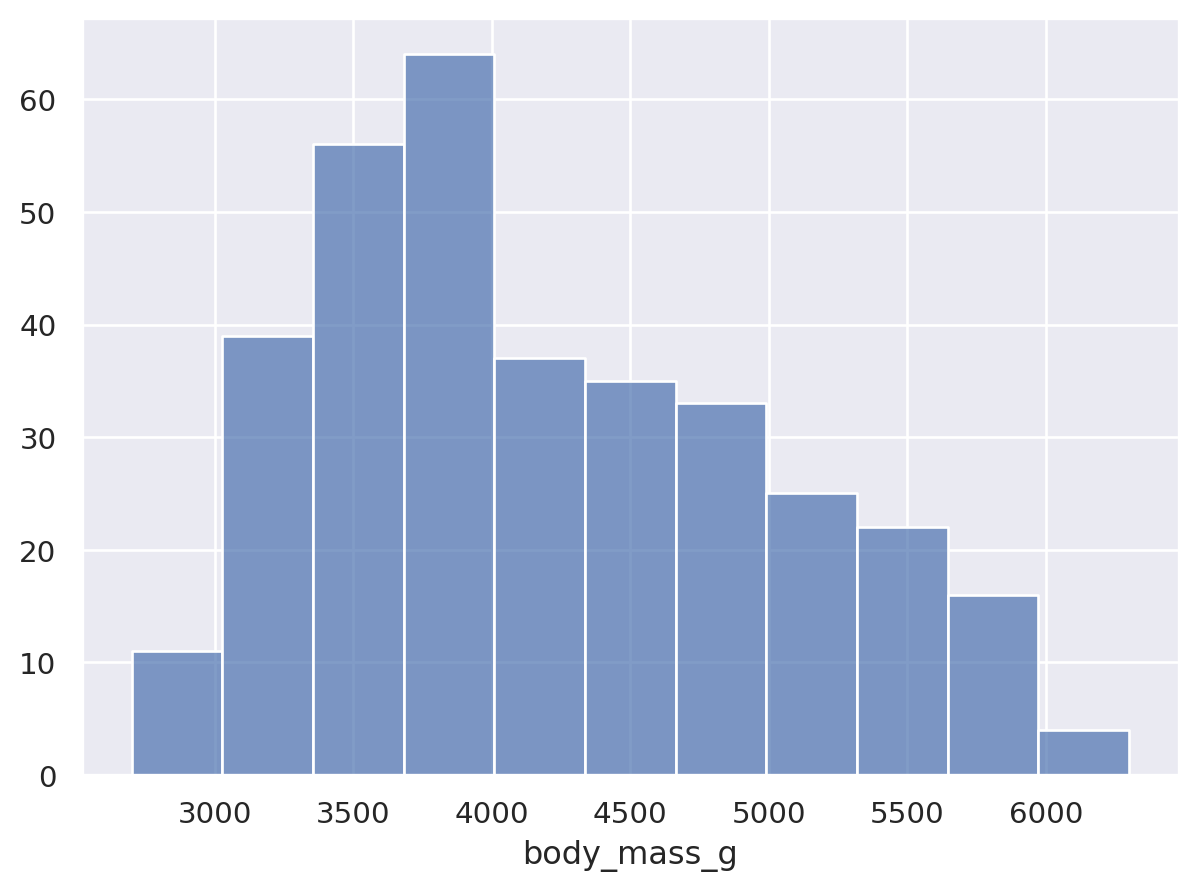

In [55]:
# Para histogramas de una variable continua es más común que no haya tanto espacio entre las barras.
# Para eso usamos Bars en lugar de Bar

(
    so.Plot(data = penguins, x = "body_mass_g")
    .add(so.Bars(), so.Hist())
)

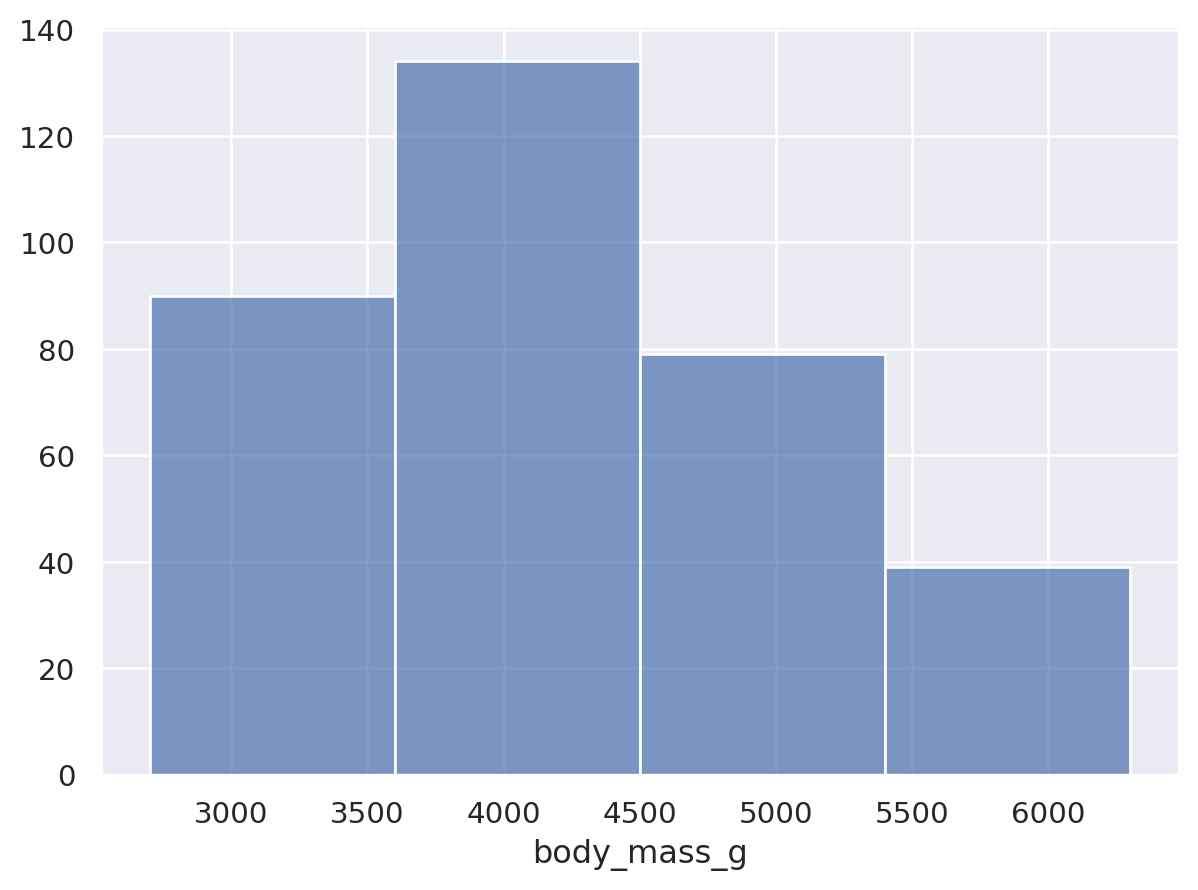

In [56]:
# Podemos cambiar la cantidad de intervalos
(
    so.Plot(data = penguins, x = "body_mass_g")
    .add(so.Bars(), so.Hist(bins = 4))
)

## Box plot

### Ejercicio
Realizar en el cuaderno un grafico boxplot para los siguientes datos:
$$
respuestas = \{10, 15, 20, 24, 30, 50, 54, 60, 62, 70, 100, 105\}
$$

Verificar el gráfico en Python.

En Seaborn objects no tenemos la opción de realizar box plots. Podemos hacerlos utilizando `seaborn.boxplot()`. Los parámetros a pasar son similares.


In [65]:
datos = pd.Series([10, 15, 20, 24, 30, 50, 54, 60, 62, 70, 100, 105])

display(datos.quantile(.25,interpolation="midpoint"))  # Primer cuantil
display(datos.quantile(.50))   # Segundo cuantil
display(datos.quantile(.75,interpolation="midpoint"))  # Tercer cuantil

#sns.boxplot(???)


22.0

52.0

66.0

### Ejercicio.
A partir de qué valor la última respuesta (105) pasaría a ser outlier en el gráfico?

Verificarlo en Python.

<Axes: >

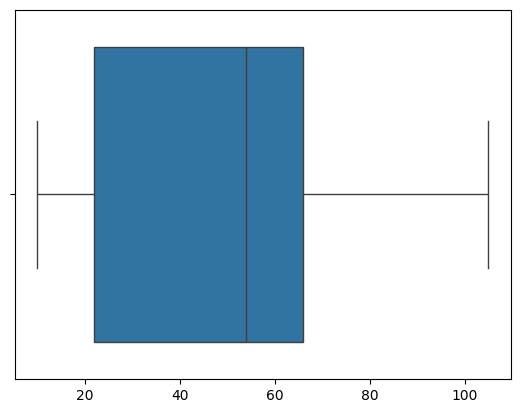

In [69]:
respuestas = pd.Series([10, 15, 20, 24, 30, 54, 60, 62, 70, 100, 105]) # Tendriamos que poner un numero mas grande que 132
sns.boxplot(respuestas, orient = "h")


In [66]:
# Los mismos datos del histograma anterior del peso de los pingüinos,
# podemos representarlos en un BoxPlot
fig, ax =plt.subplots(1,2)
fig.set_figwidth(12)
(
    so.Plot(data = penguins, x = "body_mass_g")
    .add(so.Bars(), so.Hist())
    .on(ax[0]).plot()
)
sns.boxplot(penguins, x="body_mass_g", ax = ax[1])
plt.show()



In [70]:
# Si queremos comparar distintos grupos de datos, podemos hacer boxplots para cada grupo
# Los mismos datos del histograma anterior, los representamos en un BoxPlot
sns.boxplot(data = penguins, x="species", y = "body_mass_g", hue = "species")
plt.show()

**Ejercicio.** ¿Qué conclusiones podemos sacar en base a este gráfico?

### Cantidad de pasajeros por año

In [ ]:
# También podemos representar la información de vuelos por mes utilizando boxplots.
#sns.boxplot(data = flights, ???)

<Axes: xlabel='year', ylabel='passengers'>

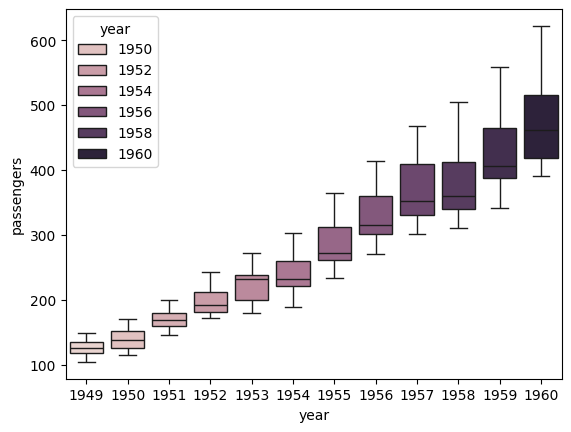

In [80]:
sns.boxplot(data=flights,x="year",y="passengers",hue="year")

In [81]:
(
    so.Plot(data=flights, x="year",y="passengers")
    .add(so.Bar(),so.Agg("sum"))
)